# https://gymnasium.farama.org/environments/classic_control/cart_pole/

##`observation_space` of **CartPole-v1** step by step:

---

##  Observation Space

```python
Box(
  low=[-4.8,         -inf,        -0.41887903,   -inf],
  high=[4.8,         inf,         0.41887903,    inf],
  shape=(4,),
  dtype=float32
)
```

This means:

* The observation is a **4D continuous vector** (i.e., shape `(4,)`)
* Each value in the vector has a **range (low to high)**
* These values are **floats**

---

##  What Each of the 4 Values Represents

| Index | Feature                   | Range                        | Description                                              |
| ----- | ------------------------- | ---------------------------- | -------------------------------------------------------- |
| `0`   | **Cart position**         | `-4.8` to `+4.8`             | Horizontal position of the cart on the track (in meters) |
| `1`   | **Cart velocity**         | `-∞` to `+∞`                 | Speed of the cart (m/s) — **unbounded**                  |
| `2`   | **Pole angle**            | `-0.418` to `+0.418` radians | Angle of the pole from vertical (±24°)                   |
| `3`   | **Pole angular velocity** | `-∞` to `+∞`                 | How fast the pole is rotating (rad/s) — **unbounded**    |

---

###  Why are some values infinite (`inf`)?

Because:

* Some features (like **velocities**) are **not physically limited** by the environment.
* However, in practice, they don’t grow indefinitely — they’re **naturally constrained** by physics and the simulation time.

---

##  Units

* Position: meters
* Velocity: meters/second
* Angle: radians (±0.418 rad ≈ ±24 degrees)
* Angular velocity: radians/second

---

## Summary

| Feature               | Value Range        | Role in balancing pole          |
| --------------------- | ------------------ | ------------------------------- |
| Cart Position         | `[-4.8, +4.8]`     | Stay on track                   |
| Cart Velocity         | `(-∞, +∞)`         | Don't let cart go too fast      |
| Pole Angle            | `[-0.418, +0.418]` | Keep pole near vertical         |
| Pole Angular Velocity | `(-∞, +∞)`         | Don't let pole fall too quickly |

---



 # output from the `CartPole-v1` environment's `env.step(action)` call:

---

```python
env.step(0)

(
  array([ 0.07426766,  0.04195905, -0.23160739, -0.77162653], dtype=float32),
  0.0,
  True,
  False,
  {}
)
```

This tuple contains **5 elements**, which is the standard output of `env.step(action)` in **Gymnasium** environments:

---

##  1. `obs` (Observation)

```python


array([ 0.07426766,  0.04195905, -0.23160739, -0.77162653], dtype=float32)
```

This is the **new state of the environment** after taking the action.

It contains **4 float values**, representing:

| Index | Feature               | Value     | Meaning                                 |
| ----- | --------------------- | --------- | --------------------------------------- |
| `0`   | Cart Position         | `0.0742`  | Cart is slightly to the right of center |
| `1`   | Cart Velocity         | `0.0419`  | Moving slightly to the right            |
| `2`   | Pole Angle (radians)  | `-0.2316` | Pole is leaning to the left (\~13.3°)   |
| `3`   | Pole Angular Velocity | `-0.7716` | Pole is falling leftward rapidly        |

---

##  2. `reward`

```python
0.0
```

* This is the **reward** received for this step.
* In `CartPole-v1`, the usual reward is **+1** for every step the pole is upright.
* Getting a reward of **0.0** means the episode **ended** this step — so no reward is given.

---

##  3. `terminated`

```python
True
```

* This means the **episode has ended due to failure**.
* In CartPole, termination happens if:

  * The pole angle exceeds ±12 degrees
  * Or the cart position goes outside ±2.4 units
* Since the pole angle is \~13.3°, it likely failed by angle

---

##  4. `truncated`

```python
False
```

* `truncated = True` if the episode ended **due to time limit** (usually 500 steps)
* Here it is `False`, so episode ended **early due to failure**, not timeout.

---

##  5. `info`

```python
{}
```

* This is an **optional dictionary** for extra debug info (empty in CartPole)
* Some environments use this to return things like trajectory scores, termination reasons, etc.

---




In [ ]:
!apt-get install swig cmake
!pip install box2d-py
!pip install gymnasium[box2d]


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 1,116 kB of archives.
After this operation, 5,542 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig4.0 amd64 4.0.2-1ubuntu1 [1,110 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig all 4.0.2-1ubuntu1 [5,632 B]
Fetched 1,116 kB in 1s (1,024 kB/s)
Selecting previously unselected package swig4.0.
(Reading database ... 126308 files and directories currently installed.)
Preparing to unpack .../swig4.0_4.0.2-1ubuntu1_amd64.deb ...
Unpacking swig4.0 (4.0.2-1ubuntu1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_4.0.2-1ubu

In [ ]:
!pip install gymnasium[all]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/20

In [ ]:
# !pip install gymnasium classic_control stable-baselines3[extra]


In [ ]:
!pip install stable-baselines3[extra]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 4.7 MB/s eta 0:00:00


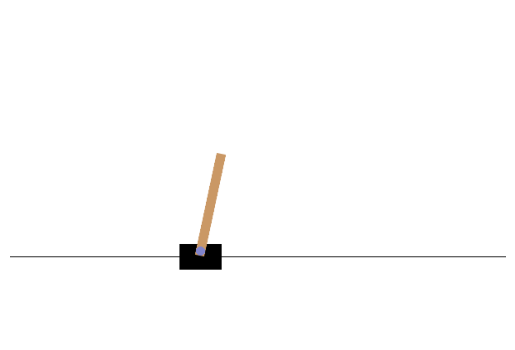

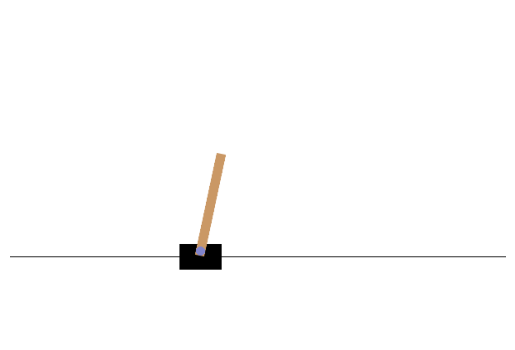

In [ ]:
# --------------------------------------------
#  Reinforcement Learning with PPO and Gym
# Trains an agent on the CartPole-v1 environment
# and visualizes its behavior after training
# --------------------------------------------

#  Import required libraries
import gymnasium as gym                            # Gym: Standard RL environments (CartPole, etc.)
from stable_baselines3 import PPO                 # PPO: Proximal Policy Optimization algorithm
import torch                                      # Torch: To check for GPU availability
import matplotlib.pyplot as plt                   # For displaying frames of the environment
from IPython.display import display, clear_output # For smooth frame updates in Jupyter notebooks
import time                                       # To add delay between frames

# --------------------------------------------
#  Check if GPU is available (helps training faster)
# --------------------------------------------
print("GPU Available:", torch.cuda.is_available())

# --------------------------------------------
#  Create the CartPole environment
# render_mode='rgb_array' allows us to get frames as images
# --------------------------------------------
env = gym.make("CartPole-v1", render_mode="rgb_array")

# --------------------------------------------
#  Create the PPO model
# 'MlpPolicy' = a basic neural network (multi-layer perceptron) for policy and value function
# 'env' = the environment we created
# verbose=1 shows training progress
# --------------------------------------------
model = PPO("MlpPolicy", env, verbose=1)

# --------------------------------------------
#  Train the model
# total_timesteps = how many actions the agent will take during training
# (10 is very small – use 10000+ for real learning)
# --------------------------------------------
model.learn(total_timesteps=10)

# --------------------------------------------
#  Reset environment before testing the trained agent
# obs = initial observation (state)
# done = flag to indicate when episode ends
# --------------------------------------------
obs, _ = env.reset()
done = False

# --------------------------------------------
#  Let the trained agent interact with the environment
#     - At each step, choose an action using the trained model
#     - Render the frame using matplotlib
#     - Continue until the episode is done
# --------------------------------------------
step_count = 0
while not done:
    # Use the trained model to predict the next action given the current observation
    action, _ = model.predict(obs)

    # Print the chosen action
    print(f"Step {step_count}: Action taken → {action}")

    # Perform the action in the environment and get the new observation and reward
    obs, reward, terminated, truncated, _ = env.step(action)

    # Determine if episode is finished (either by success or timeout)
    done = terminated or truncated

    # Render the current frame (image of the environment)
    frame = env.render()

    # Display the frame using matplotlib (simulate animation)
    plt.imshow(frame)
    plt.axis("off")             # Hide axis ticks
    clear_output(wait=True)     # Clear previous frame
    display(plt.gcf())          # Display current frame
    time.sleep(1)               # Add delay between frames

    step_count += 1


In [ ]:
env.observation_space

Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)

In [ ]:
env.step(0)

/usr/local/lib/python3.11/dist-packages/gymnasium/envs/classic_control/cartpole.py:214: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(


(array([ 0.07426766,  0.04195905, -0.23160739, -0.77162653], dtype=float32),
 0.0,
 True,
 False,
 {})



##  Common Policy Types for SB3 PPO

Here are the main options:

###  `"MlpPolicy"` (Default)

* **Multilayer Perceptron** (feedforward neural network)
* Best for **low-dimensional**, **vector-based** observations
   e.g., `CartPole`, `MountainCar`, `LunarLander`, etc.

---

###  `"CnnPolicy"`

* **Convolutional Neural Network**
* Used for **image-based environments**
   e.g., Atari games (`Breakout`, `Pong`) where observations are 2D images

---

###  `"MultiInputPolicy"`

* For environments that return **dictionaries of observations**
  (e.g., combining images + scalar values)

Example:

```python
obs = {
  'camera': image_array,     # shape: (3, 64, 64)
  'sensors': vector_array    # shape: (10,)
}
```

This policy builds **different subnetworks** for each input and then merges them.

---

##  Summary Table

| Policy Name          | Description                            | When to Use                            |
| -------------------- | -------------------------------------- | -------------------------------------- |
| `"MlpPolicy"`        | Fully connected layers                 | Vector inputs (e.g., CartPole)         |
| `"CnnPolicy"`        | Convolutional layers                   | Image inputs (e.g., Atari games)       |
| `"MultiInputPolicy"` | Handles dictionary (multi-modal) input | Multiple inputs (e.g., image + vector) |

---

##  Example Usages

```python
# For vector observation (e.g., CartPole)
model = PPO("MlpPolicy", env)

# For pixel observation (e.g., Pong)
model = PPO("CnnPolicy", env)

# For hybrid observations (e.g., sensors + image)
model = PPO("MultiInputPolicy", env)
```

---


 In Reinforcement Learning (RL), **policy gradient algorithms** are a family of methods where the agent **directly learns a policy** — i.e., a mapping from states to actions — by **optimizing the expected return using gradient ascent**.

---

##  Types of Policy Gradient Algorithms

We can divide them into **three major types**:

---

###  1. **Vanilla Policy Gradient (REINFORCE)**

* The most basic form.

* Directly applies the **Policy Gradient Theorem**:

  $$
  \nabla_\theta J(\theta) = \mathbb{E}[\nabla_\theta \log \pi_\theta(a|s) \cdot R_t]
  $$

* High variance, but simple and unbiased.

* No baseline (unless added manually).

 **Example:** `REINFORCE` algorithm

---

###  2. **Policy Gradient with Baseline (Actor-Critic)**

* Uses a **value function** as a baseline to reduce variance.

  $$
  \nabla_\theta J(\theta) = \mathbb{E}[\nabla_\theta \log \pi_\theta(a|s) \cdot (R_t - V(s_t))]
  $$

* Has two models:

  * **Actor**: chooses actions (policy)
  * **Critic**: estimates value function $V(s)$

 **Examples:**

* **A2C** (Advantage Actor-Critic)
* **A3C** (Asynchronous Advantage Actor-Critic)
* **DDPG** (Deep Deterministic Policy Gradient – for continuous actions)
* **TD3** (Twin Delayed DDPG – improved version of DDPG)

---

###  3. **Trust Region & Clipped Policy Gradient**

These use **constraints** or **clipping** to avoid large, unstable policy updates.

####  Trust Region Policy Optimization (TRPO)

* Uses **KL divergence constraint**:

  $$
  \max_{\theta} \mathbb{E}[\frac{\pi_\theta}{\pi_{\theta_{old}}} \hat{A}] \quad \text{subject to } D_{KL}(\pi_{\theta_{old}} || \pi_\theta) \leq \delta
  $$

* Very stable, but computationally heavy

####  Proximal Policy Optimization (PPO)

* Uses **clipping** instead of hard KL constraint:

  $$
  L(\theta) = \mathbb{E}\left[\min(r(\theta) \hat{A}, \text{clip}(r(\theta), 1 - \epsilon, 1 + \epsilon) \hat{A})\right]
  $$

  where $r(\theta) = \frac{\pi_\theta}{\pi_{\theta_{\text{old}}}}$

 Most commonly used today due to **simplicity + stability**

---

###  Special Policy Gradient Variants (Advanced)

| Algorithm                                            | Description                                                   |
| ---------------------------------------------------- | ------------------------------------------------------------- |
| **SAC** (Soft Actor-Critic)                          | Off-policy; adds entropy bonus to encourage exploration       |
| **APPO** (Asynchronous PPO)                          | Distributed version of PPO                                    |
| **IMPALA**                                           | Scalable actor-critic with off-policy correction              |
| **GAIL** (Generative Adversarial Imitation Learning) | Uses a discriminator + policy gradient for imitation learning |

---
